#**Generation and Plotting of the XOR Dataset**



cpu


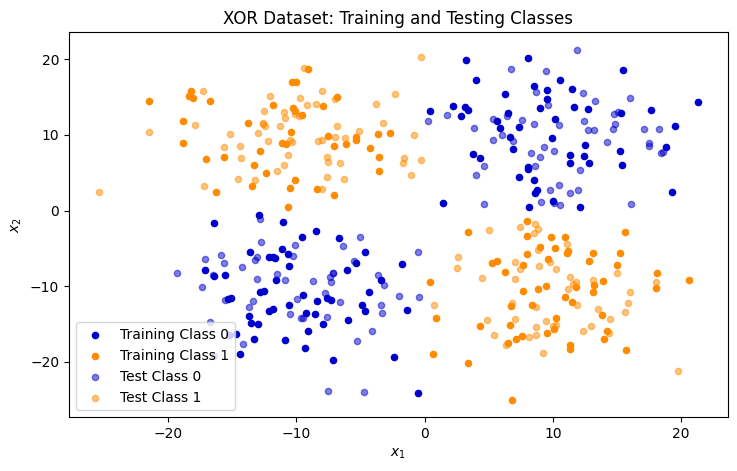

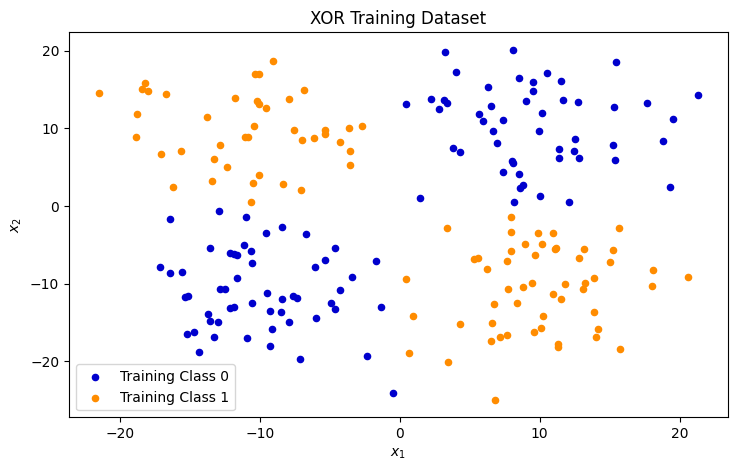

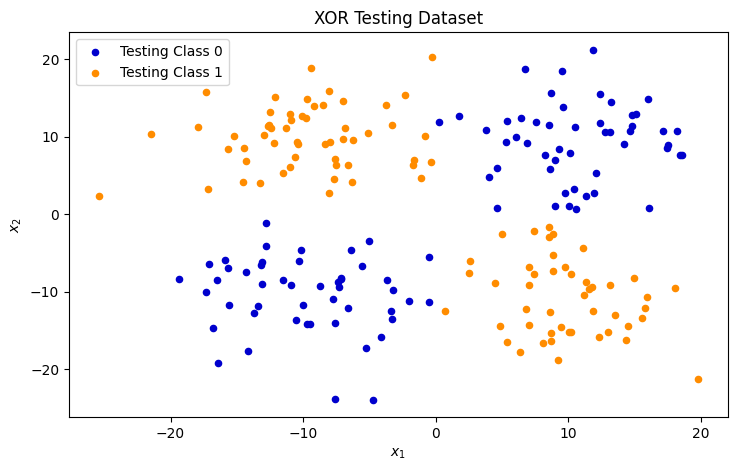

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
  

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

def create_xor_dataset(size):
    centers = [[10, 10], [-10, 10], [-10, -10], [10, -10]]
    X, Y = make_blobs(n_samples=size, centers=centers, n_features=2, random_state=7, cluster_std=5)
    X = torch.FloatTensor(X)
    y = ((X[:, 0] > 0) ^ (X[:, 1] > 0)).float()
    return X, y

X, y = create_xor_dataset(400)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

colors = ["mediumblue", "darkorange"]

def plot_xor_dataset(X_train, y_train, X_test, y_test):
    plt.figure(figsize=(8.5, 5))
    y_train = y_train.squeeze()
    y_test = y_test.squeeze()

    plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1],
                c=colors[0], label="Training Class 0", s=20)

    plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1],
                c=colors[1], label="Training Class 1", s=20)

    plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1],
                c=colors[0], label="Test Class 0", s=20, alpha=0.5)

    plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1],
                c=colors[1], label="Test Class 1", s=20, alpha=0.5)

    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")
    plt.title("XOR Dataset: Training and Testing Classes")
    plt.legend()
    plt.show()

def plot_individual(X, y, dataset_name):
    plt.figure(figsize=(8.5, 5))
    y = y.flatten()

    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1],
                c=colors[0], label=f"{dataset_name} Class 0", s=20)

    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1],
                c=colors[1], label=f"{dataset_name} Class 1", s=20)

    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")
    plt.title(f"XOR {dataset_name} Dataset")
    plt.legend()
    plt.show()

plot_xor_dataset(X_train, y_train, X_test, y_test)

plot_individual(X_train, y_train, "Training")
plot_individual(X_test, y_test, "Testing")

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

X_train shape: torch.Size([200, 2])
X_test shape: torch.Size([200, 2])
y_train shape: torch.Size([200, 1])
y_test shape: torch.Size([200, 1])


#**Model Architecture**

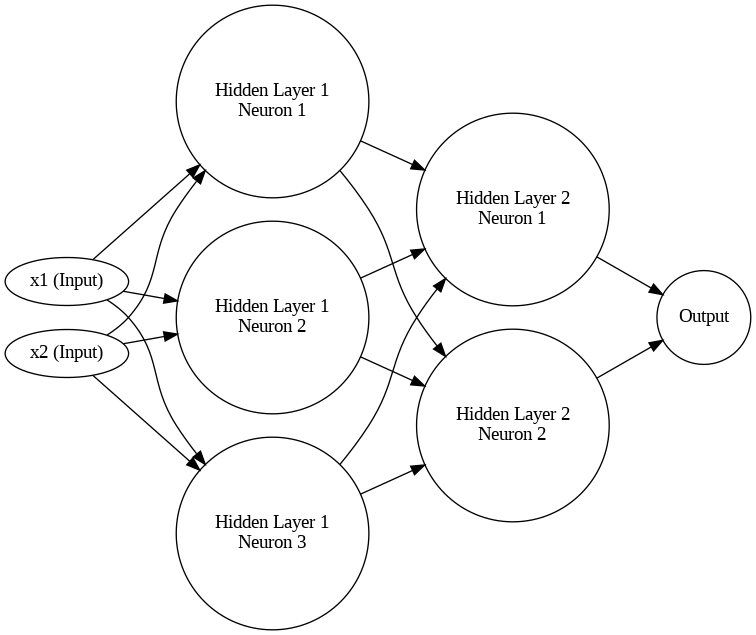

In [ ]:
from graphviz import Digraph
from IPython.display import Image, display

def visualize_xor_mlp(hidden_layer1, hidden_layer2, width, height):
    dot = Digraph("XORMLP Architecture", format="png")
    dot.attr(rankdir="LR")

    dot.node("x1", "x1 (Input)")
    dot.node("x2", "x2 (Input)")

    for i in range(hidden_layer1):
        dot.node(f"h1_{i+1}", f"Hidden Layer 1\nNeuron {i+1}", shape="circle")

    for j in range(hidden_layer2):
        dot.node(f"h2_{j+1}", f"Hidden Layer 2\nNeuron {j+1}", shape="circle")

    dot.node("output", "Output", shape="circle")

    for i in range(hidden_layer1):
        dot.edge("x1", f"h1_{i+1}")
        dot.edge("x2", f"h1_{i+1}")

    for i in range(hidden_layer1):
        for j in range(hidden_layer2):
            dot.edge(f"h1_{i+1}", f"h2_{j+1}")

    for j in range(hidden_layer2):
        dot.edge(f"h2_{j+1}", "output")

    graph_path = dot.render("XORMLP_Architecture", format="png")

    display(Image(graph_path, width=width*100, height=height*100))

visualize_xor_mlp(3, 2, width=7, height=5)

In [48]:
class XOR_MLP(nn.Module):
    def __init__(self, hidden_layer1, hidden_layer2):
        super(XOR_MLP, self).__init__()
        self.lin1 = nn.Linear(2, hidden_layer1)
        self.lin2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.lin3 = nn.Linear(hidden_layer2, 1)

    def forward(self, x):
        x = F.relu(self.lin1(x))
        x = F.relu(self.lin2(x))
        logits = self.lin3(x)
        return logits

#**MLP with no Regularization**

In [67]:
model1 = XOR_MLP(hidden_layer1=3, hidden_layer2=2)

for name, param in model1.named_parameters():
    print(f"{name}: {param.shape}")

print("\n")

state_dict = model1.state_dict()
print(state_dict)

lin1.weight: torch.Size([3, 2])
lin1.bias: torch.Size([3])
lin2.weight: torch.Size([2, 3])
lin2.bias: torch.Size([2])
lin3.weight: torch.Size([1, 2])
lin3.bias: torch.Size([1])


OrderedDict([('lin1.weight', tensor([[ 0.0049,  0.4956],
        [-0.2372, -0.4933],
        [-0.6801, -0.1282]])), ('lin1.bias', tensor([ 0.4325, -0.4076,  0.3092])), ('lin2.weight', tensor([[ 0.4012,  0.4154, -0.5222],
        [ 0.1366, -0.0355,  0.1280]])), ('lin2.bias', tensor([-0.5145, -0.2132])), ('lin3.weight', tensor([[ 0.4409, -0.6015]])), ('lin3.bias', tensor([0.0127]))])


#**Model Training and Performance**

In [68]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.03)

train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

num_epochs = 1000
for epoch in range(num_epochs):
    total_loss = 0.0
    correct_preds = 0
    total_samples = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        logits = model1(inputs)
        loss = loss_fn(logits, labels)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct_preds += ((logits > 0) == labels).sum().item()
        total_samples += labels.size(0)

    avg_loss = total_loss / len(train_loader)
    accuracy = correct_preds / total_samples

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}] | Loss: {avg_loss:.4f} | Accuracy: {accuracy:.4f}")

model1.eval()

with torch.no_grad():
    logits = model1(X_test)
    predictions = (logits > 0).float()
    accuracy = (predictions == y_test).float().mean().item()

print("\n")

print(f"Test Accuracy: {accuracy:.4f}")

Epoch [100/1000] | Loss: 0.0080 | Accuracy: 1.0000
Epoch [200/1000] | Loss: 0.0144 | Accuracy: 0.9950
Epoch [300/1000] | Loss: 0.0013 | Accuracy: 1.0000
Epoch [400/1000] | Loss: 0.0014 | Accuracy: 1.0000
Epoch [500/1000] | Loss: 0.0006 | Accuracy: 1.0000
Epoch [600/1000] | Loss: 0.0003 | Accuracy: 1.0000
Epoch [700/1000] | Loss: 0.0002 | Accuracy: 1.0000
Epoch [800/1000] | Loss: 0.0001 | Accuracy: 1.0000
Epoch [900/1000] | Loss: 0.0001 | Accuracy: 1.0000
Epoch [1000/1000] | Loss: 0.0001 | Accuracy: 1.0000


Test Accuracy: 0.9750


**Without regularization, it relatively struggled to generalize well on unseen data, leading to overfitting on the XOR dataset and reduced accuracy**

#**Decision Boundary on XOR Dataset**

In [69]:
def plot_decision_boundary(X_train, X_test, y_train, y_test, model, title, device='cpu'):
    plt.figure(figsize=(8.5, 5))

    X = torch.cat([X_train, X_test], dim=0).cpu().numpy()
    y = torch.cat([y_train, y_test], dim=0).cpu().numpy()

    y_train = y_train.squeeze().cpu().numpy()
    y_test = y_test.squeeze().cpu().numpy()

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]).to(device))
    Z = (Z > 0).float().cpu().numpy().reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.4)

    plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='mediumblue', s=20, label='Train Class 0')
    plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='darkorange', s=20, label='Train Class 1')

    plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='mediumblue', s=20, alpha=0.5, label='Test Class 0')
    plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='darkorange', s=20, alpha=0.5, label='Test Class 1')

    pred_class0_patch = mpatches.Patch(color='lightblue', label='Predicted Class 0')
    pred_class1_patch = mpatches.Patch(color='lightcoral', label='Predicted Class 1')

    plt.legend(handles=[
        mpatches.Patch(color='mediumblue', label='Train Class 0'),
        mpatches.Patch(color='darkorange', label='Train Class 1'),
        mpatches.Patch(color='mediumblue', label='Test Class 0',alpha=0.5),
        mpatches.Patch(color='darkorange', label='Test Class 1',alpha=0.5),
        pred_class0_patch,
        pred_class1_patch
    ], loc="upper left", bbox_to_anchor=(1, 1), fontsize='small', fancybox=True, shadow=True)

    plt.title(title)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")

    plt.tight_layout(rect=[0, 0, 0.85, 1])

    plt.show()

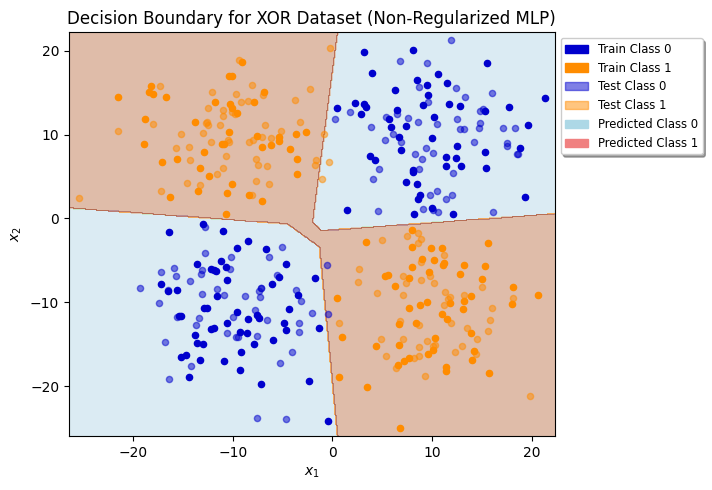

In [70]:
plot_decision_boundary(X_train, X_test, y_train, y_test, model1, "Decision Boundary for XOR Dataset (Non-Regularized MLP)")

**Effectively captures the XOR shape with a smooth, non-linear decision boundary**

#**MLP with $L_1$ Regularization**

In [ ]:
model2 = XOR_MLP(hidden_layer1=3, hidden_layer2=2)

for name, param in model2.named_parameters():
    print(f"{name}: {param.shape}")

print("\n")

state_dict = model2.state_dict()
print(state_dict)

lin1.weight: torch.Size([3, 2])
lin1.bias: torch.Size([3])
lin2.weight: torch.Size([2, 3])
lin2.bias: torch.Size([2])
lin3.weight: torch.Size([1, 2])
lin3.bias: torch.Size([1])


OrderedDict([('lin1.weight', tensor([[-0.0639,  0.0938],
        [ 0.4181,  0.1609],
        [ 0.2967,  0.6916]])), ('lin1.bias', tensor([-0.6850,  0.4409,  0.0027])), ('lin2.weight', tensor([[ 0.0359, -0.5184, -0.0775],
        [-0.0140,  0.2567, -0.5316]])), ('lin2.bias', tensor([0.1714, 0.2785])), ('lin3.weight', tensor([[0.3397, 0.2975]])), ('lin3.bias', tensor([0.0945]))])


#**Model Training and Performance**

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.03)

gamma = 0.001

train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

for epoch in range(1000):
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        logits = model2(inputs)

        loss = loss_fn(logits, labels)

        l1_regularization = sum(torch.norm(param, 1) for param in model2.parameters())
        loss += gamma * l1_regularization

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        correct += ((logits > 0) == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / len(train_loader)
    accuracy = correct / total

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/10000] | Loss: {epoch_loss:.4f} | Accuracy: {accuracy:.4f}")

model2.eval()

print("\n")

with torch.no_grad():
    logits = model2(X_test)
    predictions = (logits > 0).float()
    accuracy = (predictions == y_test).sum().item() / y_test.size(0)
    print(f"Test Accuracy: {accuracy:.4f}")

Epoch [100/10000] | Loss: 0.0296 | Accuracy: 1.0000
Epoch [200/10000] | Loss: 0.0273 | Accuracy: 1.0000
Epoch [300/10000] | Loss: 0.0255 | Accuracy: 1.0000
Epoch [400/10000] | Loss: 0.0241 | Accuracy: 1.0000
Epoch [500/10000] | Loss: 0.0234 | Accuracy: 1.0000
Epoch [600/10000] | Loss: 0.0821 | Accuracy: 0.9850
Epoch [700/10000] | Loss: 0.0304 | Accuracy: 1.0000
Epoch [800/10000] | Loss: 0.0283 | Accuracy: 1.0000
Epoch [900/10000] | Loss: 0.0296 | Accuracy: 1.0000
Epoch [1000/10000] | Loss: 0.0719 | Accuracy: 0.9900


Test Accuracy: 0.9800


**Adding L1 penalizes less important weights, promoting sparsity. This helped reduce overfitting by keeping only the most critical weights, improving accuracy over the standard model**

#**Decision Boundary on XOR Dataset**

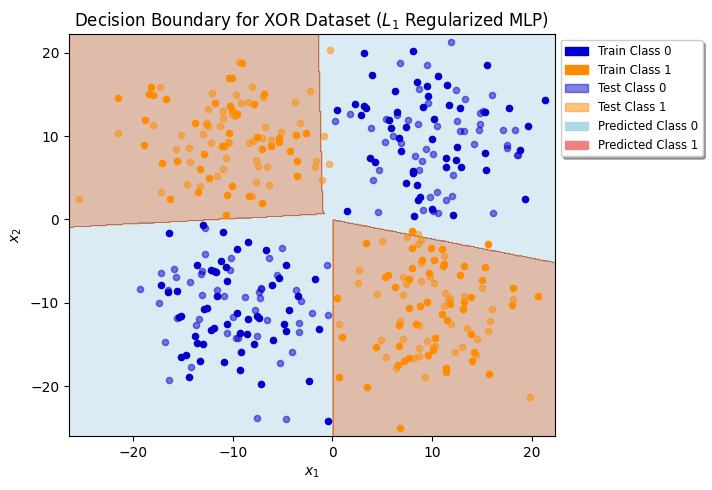

In [ ]:
plot_decision_boundary(X_train, X_test, y_train, y_test, model2, r"Decision Boundary for XOR Dataset ($L_1$ Regularized MLP)")

**Maintains a similar boundary to the standard MLP but appear less smooth due to sparsity in weights**

#**MLP with $L_2$ Regularization**

In [ ]:
model3 = XOR_MLP(hidden_layer1=3, hidden_layer2=2)

for param_name, param in model3.named_parameters():
    print(f"{param_name}: {param.shape}")

print("\n")

state_dict = model3.state_dict()
print(state_dict)

lin1.weight: torch.Size([3, 2])
lin1.bias: torch.Size([3])
lin2.weight: torch.Size([2, 3])
lin2.bias: torch.Size([2])
lin3.weight: torch.Size([1, 2])
lin3.bias: torch.Size([1])


OrderedDict([('lin1.weight', tensor([[-0.6545, -0.5758],
        [-0.1531, -0.6733],
        [-0.2071,  0.5946]])), ('lin1.bias', tensor([ 0.3818,  0.2006, -0.5863])), ('lin2.weight', tensor([[-0.2577,  0.3940, -0.1784],
        [-0.3183, -0.2046,  0.2397]])), ('lin2.bias', tensor([ 0.0079, -0.2694])), ('lin3.weight', tensor([[0.6873, 0.3162]])), ('lin3.bias', tensor([-0.1291]))])


#**Model Training and Performance**

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model3.parameters(), lr=0.03)

gamma = 0.001

train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

for epoch in range(1000):
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        logits = model3(inputs)
        loss = loss_fn(logits, labels)

        l2_regularization = 0.0
        for param in model3.parameters():
            l2_regularization += torch.norm(param, 2)
        loss += gamma * l2_regularization

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        correct += ((logits > 0) == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / len(train_loader)
    accuracy = correct / total

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/10000] | Loss: {epoch_loss} | Accuracy: {accuracy:.4f}")

model3.eval()

print("\n")

with torch.no_grad():
    logits = model3(X_test)
    predictions = (logits > 0).float()
    accuracy = (predictions == y_test).sum().item() / y_test.size(0)
    print(f"Test Accuracy: {accuracy:.4f}")

Epoch [100/10000] | Loss: 0.019678428503019468 | Accuracy: 1.0000
Epoch [200/10000] | Loss: 0.09335988946259022 | Accuracy: 0.9800
Epoch [300/10000] | Loss: 0.09474317197288785 | Accuracy: 0.9800
Epoch [400/10000] | Loss: 0.0921834149797048 | Accuracy: 0.9800
Epoch [500/10000] | Loss: 0.019386588196669306 | Accuracy: 1.0000
Epoch [600/10000] | Loss: 0.02289187242942197 | Accuracy: 1.0000
Epoch [700/10000] | Loss: 0.020847031314458166 | Accuracy: 1.0000
Epoch [800/10000] | Loss: 0.019369130421962057 | Accuracy: 1.0000
Epoch [900/10000] | Loss: 0.08013865670987538 | Accuracy: 0.9850
Epoch [1000/10000] | Loss: 0.07780433765479497 | Accuracy: 0.9850


Test Accuracy: 0.9850


 **L2 regularization penalizes large weights more smoothly than L1, promoting smaller, more stable weights that generalize better. This led to even better generalization and accuracy on XOR datasets than L1**

#**Decision Boundary on XOR Dataset**

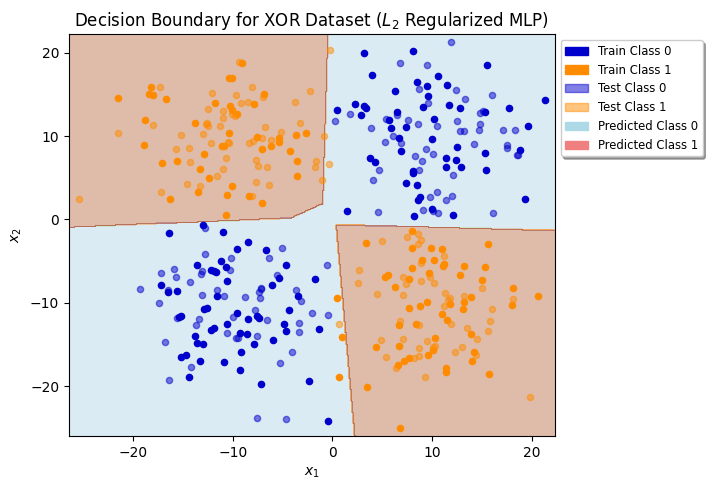

In [ ]:
plot_decision_boundary(X_train, X_test, y_train, y_test, model3, r"Decision Boundary for XOR Dataset ($L_2$ Regularized MLP)")

**Produces a smooth decision surface that closely resembles the standard MLP while controlling for overfitting**

#**Logistic Regression using Additional Polynomial Features**

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

X_train_custom = np.column_stack((X_train[:, 0],
                                   X_train[:, 1],
                                   X_train[:, 0]**2,
                                   X_train[:, 1]**2,
                                   X_train[:, 0] * X_train[:, 1]))

X_test_custom = np.column_stack((X_test[:, 0],
                                  X_test[:, 1],
                                  X_test[:, 0]**2,
                                  X_test[:, 1]**2,
                                  X_test[:, 0] * X_test[:, 1]))

logreg = LogisticRegression(penalty='l2', C=10e3)
logreg.fit(X_train_custom, y_train)

y_train_pred = logreg.predict(X_train_custom)
y_test_pred = logreg.predict(X_test_custom)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#**Logistic Regression Performance**

In [87]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 1.0000
Test Accuracy: 0.9800



**The logistic regression model achieved good accuracy on test sets, indicating effective pattern capture**

#**Decision Boundary for Logistic Regression**

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_decision_boundary(X_train, X_test, y_train, y_test, model, title):
    plt.figure(figsize=(8.5, 5))

    X = np.concatenate([X_train, X_test], axis=0)
    y = np.concatenate([y_train, y_test], axis=0)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    meshgrid_poly = np.column_stack((xx.ravel(), yy.ravel(),
                                      xx.ravel()**2,
                                      yy.ravel()**2,
                                      xx.ravel() * yy.ravel()))

    Z = model.predict(meshgrid_poly)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.4)

    plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='mediumblue', s=20, label='Train Class 0')
    plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='darkorange', s=20, label='Train Class 1')

    plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='mediumblue', s=20, alpha=0.5, label='Test Class 0')
    plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='darkorange', s=20, alpha=0.5, label='Test Class 1')

    pred_class0_patch = mpatches.Patch(color='lightblue', label='Predicted Class 0')
    pred_class1_patch = mpatches.Patch(color='lightcoral', label='Predicted Class 1')

    plt.legend(handles=[
        mpatches.Patch(color='mediumblue', label='Train Class 0'),
        mpatches.Patch(color='darkorange', label='Train Class 1'),
        mpatches.Patch(color='mediumblue', label='Test Class 0', alpha=0.5),
        mpatches.Patch(color='darkorange', label='Test Class 1', alpha=0.5),
        pred_class0_patch,
        pred_class1_patch
    ], loc="upper left", bbox_to_anchor=(1, 1), fontsize='small', fancybox=True, shadow=True)

    plt.title(title)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    plt.show()

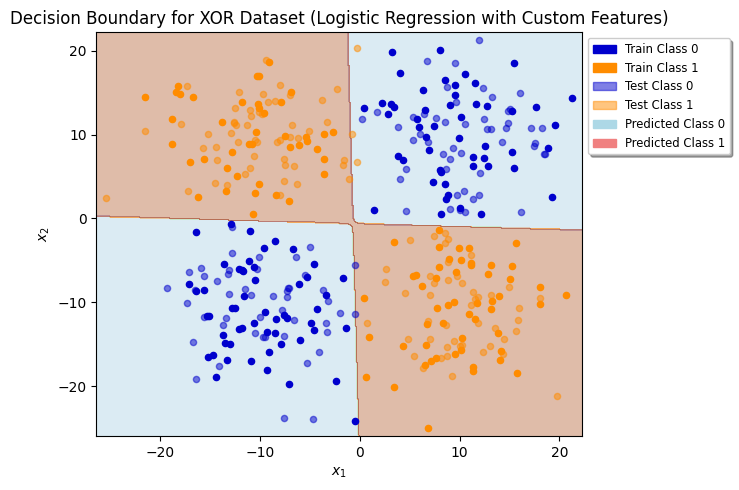

In [84]:
y_train_flat = y_train.ravel()
y_test_flat = y_test.ravel()

plot_decision_boundary(X_train, X_test, y_train_flat, y_test_flat, logreg, "Decision Boundary for XOR Dataset (Logistic Regression with Custom Features)")

**Approximated the XOR shape using polynomial features, resulting in a more complex curve but less flexible than MLP**